### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Implementação de POVMs no IBMQ

Estas notas são baseadas em (Y. S. Yordanov and C. H. W. Barnes, Implementation of a general single-qubit positive operator-valued measure on a circuit-based quantum computer, __Phys. Rev. A 100, 062317 (2019)__).

Os autores obtiveram uma forma de implementar POVM com $n$ elementos a partir da composição de operações básicas que implementam POVMs com 2 elementos.

Vale notar que na verdade os autores implementam medidas gerais. Ou seja, eles estão interessados em implementar um POVM com elementos $\{E_{j}\}=\{M_{j}^{\dagger}M_{j}\}$ em um sistema preparado inicialmente no estado $|\psi_{0}\rangle$ tal que
\begin{equation}
|\psi_{0}\rangle \xrightarrow[]{\text{obtém }M_{j}} \frac{M_{j}|\psi_{0}\rangle}{\sqrt{Pr(M_{j}|\psi_{0})}}
\end{equation}
com
\begin{equation}
Pr(M_{j}|\psi_{0}) = \langle\psi_{0}|M_{j}^{\dagger}M_{j}|\psi_{0}\rangle = ||M_{j}|\psi_{0}\rangle||^{2}.
\end{equation}

Usando um sistema auxiliar $B$, essa POVM pode ser implementada "unitariamente":
\begin{equation}
U_{AB}|\psi_{0}\rangle_{A}\otimes|0\rangle_{B} = \sum_{j}(M_{j}|\psi_{0}\rangle_{A})\otimes|j\rangle_{B}.
\end{equation}

## POVMs de 1 qubit com 2 elementos
Começamos escrevendo o estado inicial na base computacional
\begin{equation}
|\psi_{0}\rangle = c_{0}|0\rangle_{A}+c_{1}|1\rangle_{A}.
\end{equation}
A ideia é manter em mente que queremos transformar o estado inicial 
\begin{equation}
|\Psi_{0}\rangle = |\psi_{0}\rangle_{A}\otimes|0\rangle_{B}
\end{equation}
em
\begin{equation}
|\Psi_{f}\rangle = (M_{1}|\psi_{0}\rangle_{A})\otimes|o_{1}\rangle_{B} + (M_{2}|\psi_{0}\rangle_{A})\otimes|o_{2}\rangle_{B},
\end{equation}
com $\{|o_{j}\rangle\}_{j=1}^{2}$ estados ortogonais do sistema auxiliar.

A primeira operação do protocolo é uma transformação unitária no sistema $A$:
\begin{align}
|\Psi_{1}\rangle & = (U_{A}\otimes\mathbb{I}_{B})|\Psi_{0}\rangle = (U_{A}|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} \\
& := (c_{0}'|0\rangle_{A}+c_{1}'|1\rangle_{A})\otimes|0\rangle_{B}.
\end{align}

O circuito quântico, do protocolo como um todo, está mostrado na figura abaixo. 
<img src = 'qcircuit_povm2.png' width = '500'>

Seguindo aplicamos uma $R_{y}$ controlada, com o estado $|0\rangle$ como ativador. Utilizaremos a notação:

\begin{equation}
C_{R_{y}(\theta)}^{A_{0}\rightarrow B} = |0\rangle_{A}\langle 0|\otimes R_{y}(\theta) + |1\rangle_{A}\langle 1|\otimes \mathbb{I}_{B},
\end{equation}
em que 
\begin{equation}
R_{y}(\theta)=\begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}.
\end{equation}
Com isso, obteremos o estado
\begin{align}
|\Psi_{2}\rangle & = C_{R_{y}(\theta)}^{A_{0}\rightarrow B}|\Psi_{1}\rangle \\
& = c_{0}'|0\rangle_{A}\otimes\big(\cos(\theta/2)|0\rangle_{B}+\sin(\theta/2)|1\rangle_{B} \big)+c_{1}'|1\rangle_{A}\otimes|0\rangle_{B}.
\end{align}

Depois, aplica-se outra $R_{y}$ controlada, mas com $|1\rangle$ como ativador:
\begin{equation}
C_{R_{y}(\phi)}^{A_{1}\rightarrow B} = |0\rangle_{A}\langle 0|\otimes \mathbb{I}_{B} + |1\rangle_{A}\langle 1|\otimes R_{y}(\phi).
\end{equation}
Assim, obtemos o estado
\begin{align}
|\Psi_{3}\rangle & = C_{R_{y}(\phi)}^{A_{1}\rightarrow B}|\Psi_{2}\rangle \\
& = c_{0}'|0\rangle_{A}\otimes\big(\cos(\theta/2)|0\rangle_{B}+\sin(\theta/2)|1\rangle_{B} \big)+c_{1}'|1\rangle_{A}\otimes\big(\cos(\phi/2)|0\rangle_{B}+\sin(\phi/2)|1\rangle_{B} \big) \\
& = \big(\cos(\theta/2)c_{0}'|0\rangle_{A} + \cos(\phi/2)c_{1}'|1\rangle_{A}\big)\otimes|0\rangle_{B} + \big(\sin(\theta/2)c_{0}'|0\rangle_{A} + \sin(\phi/2)c_{1}'|1\rangle_{A}\big)\otimes|1\rangle_{B} \\
& = (D_{1}U_{A}|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} + (D_{2}U_{A}|\psi_{0}\rangle_{A})\otimes|1\rangle_{B}.
\end{align}

Acima definimos os operadores 
\begin{align}
D_{1} & = \cos(\theta/2)|0\rangle_{A}\langle 0| + \cos(\phi/2)|1\rangle_{A}\langle 1|, \\
D_{2} & = \sin(\theta/2)|0\rangle_{A}\langle 0| + \sin(\phi/2)|1\rangle_{A}\langle 1|,
\end{align}
que são operadores gerais de um qubit, a menos de uma transformação unitária para generalizar os autovetores. Podemos garantir que esses operadores sejam positivos restringindo
\begin{equation}
\theta,\phi\in[0,\pi].
\end{equation}

Seguimos aplicando uma unitária qualquer $V_{1}$ controlada
\begin{equation}
C_{V_{1}}^{B_{0}\rightarrow A} = V_{1}\otimes|0\rangle_{B}\langle 0| + \mathbb{I}\otimes|1\rangle_{B}\langle 1|,
\end{equation}
obtendo o estado
\begin{align}
|\Psi_{4}\rangle & = C_{V_{1}}^{B_{0}\rightarrow A}|\Psi_{3}\rangle \\
& = (V_{1}D_{1}U_{A}|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} + (D_{2}U_{A}|\psi_{0}\rangle_{A})\otimes|1\rangle_{B}.
\end{align}

Por fim, aplicamos uma unitária qualquer $V_{2}$ controlada
\begin{equation}
C_{V_{2}}^{B_{1}\rightarrow A} = \mathbb{I}_{A}\otimes|0\rangle_{B}\langle 0| + V_{2}\otimes|1\rangle_{B}\langle 1|,
\end{equation}
obtendo o estado
\begin{align}
|\Psi_{5}\rangle & = C_{V_{2}}^{B_{1}\rightarrow A}|\Psi_{4}\rangle \\
& = (V_{1}D_{1}U_{A}|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} + (V_{2}D_{2}U_{A}|\psi_{0}\rangle_{A})\otimes|1\rangle_{B} \\
& = (M_{1}|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} + (M_{2}|\psi_{0}\rangle_{A})\otimes|1\rangle_{B}.
\end{align}

Pelo teorema da _decomposição em valores singulares_, temos que para qualquer matriz $A$, existem matrizes unitárias $U$ e $W$ e uma matriz $D$ positiva e diagonal na base padrão $\{|j\rangle\}$ tais que
\begin{equation}
A = UDW.
\end{equation}
Portanto, o circuito acima é tal que temos duas matrizes "gerais"
\begin{equation}
M_{1} = V_{1}D_{1}U_{A} \text{ e } M_{2} = V_{2}D_{2}U_{A}.
\end{equation}
A possível limitação de $U_{A}$ aparecer nas duas equações é importante para que a relação de completeza dos operadores de medida seja satisfeita:
\begin{align}
\sum_{j}M_{j}^{\dagger}M_{j} & = M_{1}^{\dagger}M_{1} + M_{2}^{\dagger}M_{2} \\
& = U_{A}^{\dagger}D_{1}^{\dagger}V_{1}^{\dagger}V_{1}D_{1}U_{A} + U_{A}^{\dagger}D_{2}^{\dagger}V_{2}^{\dagger}V_{2}D_{2}U_{A} \\
& = U_{A}^{\dagger}D_{1}^{2}U_{A} + U_{A}^{\dagger}D_{2}^{2}U_{A} = U_{A}^{\dagger}\big(D_{1}^{2}+D_{2}^{2}\big)U_{A} \\
& = U_{A}^{\dagger}\big(\cos^{2}(\theta/2)|0\rangle_{A}\langle 0| + \cos^{2}(\phi/2)|1\rangle_{A}\langle 1| + \sin^{2}(\theta/2)|0\rangle_{A}\langle 0| + \sin^{2}(\phi/2)|1\rangle_{A}\langle 1|\big)U_{A} \\
& = U_{A}^{\dagger}\big(|0\rangle_{A}\langle 0| + |1\rangle_{A}\langle 1|\big)U_{A} = U_{A}^{\dagger}U_{A} \\
& = \mathbb{I}_{A}.
\end{align}

### Experimento no IBMQ
Como exemplo, usamos primeiramente operadores de medida definidos por 
\begin{equation}
\theta=\phi=\pi/4 \text{, } V_{1}=V_{2} = \mathbb{I} \text{ e } U_{A} = \frac{1}{2}\begin{bmatrix}1&0\\0&\sqrt{3}\end{bmatrix}.
\end{equation}
Assim
\begin{align}
D_{1}(\pi/8) = 2^{-1}\sqrt{2+\sqrt{2}}\mathbb{I} \text{ e } D_{2}(\pi/8) = 2^{-1}\sqrt{2-\sqrt{2}}\mathbb{I}
\end{align}
e
\begin{align}
& M_{1} = V_{1}D_{1}(\pi/8)U_{A} = \frac{1}{4}\sqrt{2+\sqrt{2}}\begin{bmatrix}1&0\\0&\sqrt{3}\end{bmatrix}, \\
& M_{2} = V_{2}D_{2}(\pi/8)U_{A} = \frac{1}{4}\sqrt{2-\sqrt{2}}\begin{bmatrix}1&0\\0&\sqrt{3}\end{bmatrix}.
\end{align}

In [6]:
%run init.ipynb

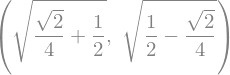

In [7]:
cos(pi/8), sin(pi/8)

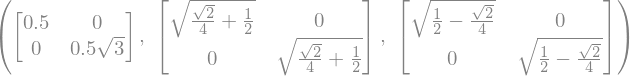

In [8]:
U = (1/2)*Matrix([[1,0],[0,sqrt(3)]]); V1 = Matrix([[1,0],[0,1]]); V2 = V1
D1 = Matrix([[cos(pi/8),0],[0,cos(pi/8)]]); D2 = Matrix([[sin(pi/8),0],[0,sin(pi/8)]])
U, D1, D2

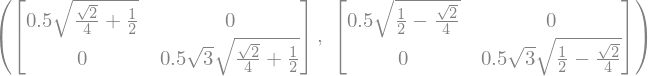

In [11]:
M1 = V1*D1*U; M2 = V2*D2*U; M1, M2

## POVMs de 1 qubit com $n$ elementos

Pode-se compor o circuito acima para implementar um POVM com $n$ elementos, como mostrado na figura abaixo:

<img src = 'qcircuit_povmn.png' width = '800'>

Os autores dizem que este circuito geral prepara o estado
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{n-1}(M_{j}|\psi_{0}\rangle)\otimes|o_{1}^{(j)}\rangle + (M_{n}|\psi_{0}\rangle)\otimes|o_{2}^{(n-1)}\rangle,
\end{equation}
com 
\begin{equation}
M_{j} = 
\begin{cases} 
V_{1}^{(1)}D_{1}^{(1)}U \text{, para } j=1, \\
V_{1}^{(j)}D_{1}^{(j)}\Pi_{k=1}^{j-1}V_{2}^{(k)}D_{2}^{(k)}U \text{, para } 1<j<n, \\
\Pi_{k=1}^{n-1}V_{2}^{(k)}D_{2}^{(k)}U \text{, para } j = n.
\end{cases}
\end{equation}

### Caso $n=3$: <br>
Depois da aplicação da porta $U$ e do módulo 1, teremos obtido o estado
\begin{equation}
|\Phi_{1}\rangle = \big((V_{1}^{(1)}D_{1}^{(1)}U|\psi_{0}\rangle_{A})\otimes|0\rangle_{B} + (V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A})\otimes|1\rangle_{B}\big)\otimes|0\rangle_{C},
\end{equation}
com 
\begin{align}
& D_{1}^{(1)} = \cos(\theta_{1}/2)|0\rangle_{A}\langle 0| + \cos(\phi_{1}/2)|1\rangle_{A}\langle 1| \\
& D_{2}^{(1)} = \sin(\theta_{1}/2)|0\rangle_{A}\langle 0| + \sin(\phi_{1}/2)|1\rangle_{A}\langle 1|.
\end{align}

Para ter algo parecido com o caso $n=2$, vamos definir
\begin{equation}
V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A} =: c|0\rangle_{A} + d|1\rangle_{A}
\end{equation}
e
\begin{equation}
V_{1}^{(1)}D_{1}^{(1)}U =: M_{1}
\end{equation}
para escrever
\begin{align}
|\Phi_{1}\rangle & = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  (c|0\rangle_{A} + d|1\rangle_{A})\otimes|10\rangle_{BC} \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  c|01\rangle_{AB}\otimes|0\rangle_{C} + d|11\rangle_{AB}\otimes|0\rangle_{C}.
\end{align}

Seguindo, aplicamos as rotações controladas 
\begin{align}
C^{A_{0}B_{1}\rightarrow C}_{R_{y}(\theta_{2})} = |0\rangle_{A}\langle 0|\otimes|1\rangle_{B}\langle 1|\otimes R_{y}(\theta_{2}) + (|0\rangle_{A}\langle 0|\otimes|0\rangle_{B}\langle 0|+|1\rangle_{A}\langle 1|\otimes|0\rangle_{B}\langle 0|+|1\rangle_{A}\langle 1|\otimes|1\rangle_{B}\langle 1|)\otimes\mathbb{I}_{C}.
\end{align}
e
\begin{align}
C^{A_{1}B_{1}\rightarrow C}_{R_{y}(\phi_{2})} = |1\rangle_{A}\langle 1|\otimes|1\rangle_{B}\langle 1|\otimes R_{y}(\phi_{2}) + (|0\rangle_{A}\langle 0|\otimes|0\rangle_{B}\langle 0|+|1\rangle_{A}\langle 1|\otimes|0\rangle_{B}\langle 0|+|0\rangle_{A}\langle 0|\otimes|1\rangle_{B}\langle 1|)\otimes\mathbb{I}_{C}.
\end{align}
para obter
\begin{align}
|\Phi_{2}\rangle & = C^{A_{1}B_{1}\rightarrow C}_{R_{y}(\phi_{2})}C^{A_{0}B_{1}\rightarrow C}_{R_{y}(\theta_{2})}|\Phi_{1}\rangle \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  c|01\rangle_{AB}\otimes R_{y}(\theta_{2})|0\rangle_{C} + d|11\rangle_{AB}\otimes R_{y}(\phi_{2})|0\rangle_{C} \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  c|01\rangle_{AB}\otimes \big(\cos(\theta_{2})|0\rangle_{C}+\sin(\theta_{2})|1\rangle_{C}\big) + d|11\rangle_{AB}\otimes \big(\cos(\phi_{2})|0\rangle_{C}+\sin(\phi_{2})|1\rangle_{C}\big) \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  \big(c\cos(\theta_{2})|0\rangle_{A}+d\cos(\phi_{2})|1\rangle_{A}\big)\otimes|10\rangle_{BC} +  \big(c\sin(\theta_{2})|0\rangle_{A}+d\sin(\phi_{2})|1\rangle_{A}\big)\otimes|11\rangle_{BC} \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  D_{1}^{(2)}\big(c|0\rangle_{A}+d|1\rangle_{A}\big)\otimes|10\rangle_{BC} +  D_{2}^{(2)}\big(c|0\rangle_{A}+d|1\rangle_{A}\big)\otimes|11\rangle_{BC} \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  D_{1}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A}\otimes|10\rangle_{BC} +  D_{2}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A}\otimes|11\rangle_{BC} \\
\end{align}
com  
\begin{align}
& D_{1}^{(2)} := \cos(\theta_{2}/2)|0\rangle_{A}\langle 0| + \cos(\phi_{2}/2)|1\rangle_{A}\langle 1|, \\
& D_{2}^{(2)} := \sin(\theta_{2}/2)|0\rangle_{A}\langle 0| + \sin(\phi_{2}/2)|1\rangle_{A}\langle 1|.
\end{align}

Aplicando $C_{V_{1}^{(2)}}^{B_{1}C_{0}\rightarrow A}$ e $C_{V_{2}^{(2)}}^{B_{1}C_{1}\rightarrow A}$ obteremos
\begin{align}
|\Phi_{3}\rangle & = C_{V_{1}^{(2)}}^{B_{1}C_{0}\rightarrow A}C_{V_{2}^{(2)}}^{B_{1}C_{1}\rightarrow A}|\Phi_{2}\rangle \\
& = M_{1}|\psi_{0}\rangle_{A}|00\rangle_{BC} +  V_{1}^{(2)}D_{1}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A}\otimes|10\rangle_{BC} +  V_{2}^{(2)}D_{2}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U|\psi_{0}\rangle_{A}\otimes|11\rangle_{BC} \\
\end{align}
com
\begin{align}
& M_{1} := V_{1}^{(1)}D_{1}^{(1)}U, \\
& M_{2} := V_{1}^{(2)}D_{1}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U, \\
& M_{3} := V_{2}^{(2)}D_{2}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U.
\end{align}

Verificação da relação de completeza:
\begin{align}
\sum_{j}M_{j}^{\dagger}M_{j} & = M_{1}^{\dagger}M_{1} + M_{2}^{\dagger}M_{2} + M_{3}^{\dagger}M_{3} \\
& = U^{\dagger}D_{1}^{(1)}(V_{1}^{(1)})^{\dagger}V_{1}^{(1)}D_{1}^{(1)}U + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}D_{1}^{(2)}(V_{1}^{(2)})^{\dagger}V_{1}^{(2)}D_{1}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U \\
& + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}D_{2}^{(2)}(V_{2}^{(2)})^{\dagger}V_{2}^{(2)}D_{2}^{(2)}V_{2}^{(1)}D_{2}^{(1)}U \\
& = U^{\dagger}(D_{1}^{(1)})^{2}U + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}(D_{1}^{(2)})^{2}V_{2}^{(1)}D_{2}^{(1)}U + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}(D_{2}^{(2)})^{2}V_{2}^{(1)}D_{2}^{(1)}U \\
& = U^{\dagger}(D_{1}^{(1)})^{2}U + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}\big((D_{1}^{(2)})^{2}+(D_{2}^{(2)})^{2}\big)V_{2}^{(1)}D_{2}^{(1)}U \\
& = U^{\dagger}(D_{1}^{(1)})^{2}U + U^{\dagger}D_{2}^{(1)}(V_{2}^{(1)})^{\dagger}V_{2}^{(1)}D_{2}^{(1)}U \\
& = U^{\dagger}(D_{1}^{(1)})^{2}U + U^{\dagger}(D_{2}^{(1)})^{2}U = U^{\dagger}\big((D_{1}^{(1)})^{2}+(D_{2}^{(1)})^{2}\big)U \\
& = U^{\dagger}U = \mathbb{I}.
\end{align}

### Experimento no IBMQ

##### Exercício
Analogamente ao que fizemos para $n=2$ e $n=3$, obtenha os operadores $M_{j}$ para $n=4$, verifique a relação de completeza e faça a simulação e implemente experimentalmente no IBMQ.